In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#importing files from drive

test = pd.read_csv('/content/gdrive/MyDrive/1_subtask2method4/test.csv')
train = pd.read_csv('/content/gdrive/MyDrive/1_subtask2method4/train.csv')
sample_submission = pd.read_csv('/content/gdrive/MyDrive/1_subtask2method4/sampleSubmission.csv')

In [ ]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [ ]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
for col in train:
    print("Number of unique entries in",col,"is",len(train[col].unique()))

Number of unique entries in ACTION is 2
Number of unique entries in RESOURCE is 7518
Number of unique entries in MGR_ID is 4243
Number of unique entries in ROLE_ROLLUP_1 is 128
Number of unique entries in ROLE_ROLLUP_2 is 177
Number of unique entries in ROLE_DEPTNAME is 449
Number of unique entries in ROLE_TITLE is 343
Number of unique entries in ROLE_FAMILY_DESC is 2358
Number of unique entries in ROLE_FAMILY is 67
Number of unique entries in ROLE_CODE is 343


In [ ]:
train.shape

(32769, 10)

In [ ]:
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

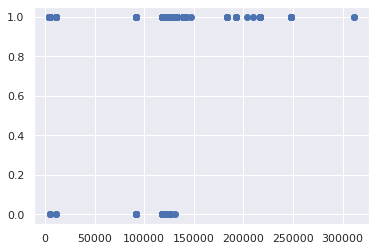

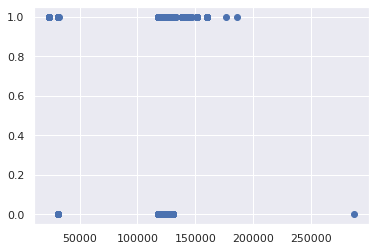

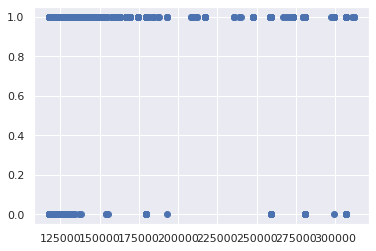

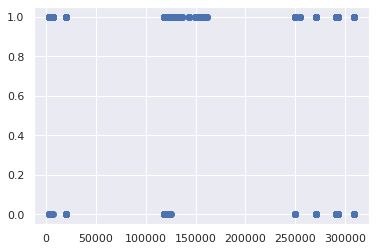

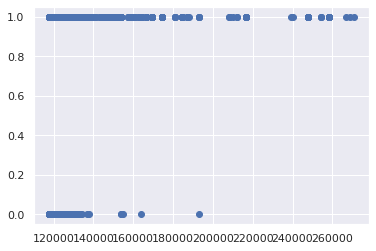

In [ ]:
x = train['ROLE_ROLLUP_1']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_ROLLUP_2']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_TITLE']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_FAMILY']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

x = train['ROLE_CODE']
y = train['ACTION']
plt.scatter(x, y)
plt.show()

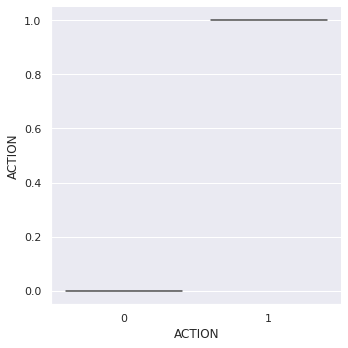

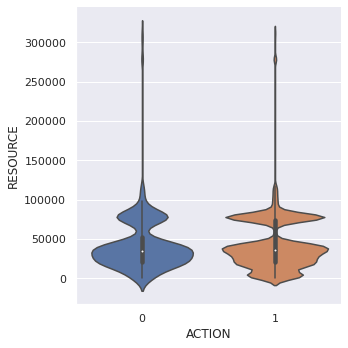

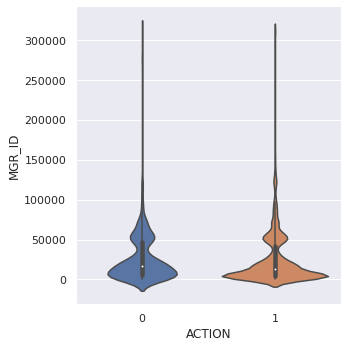

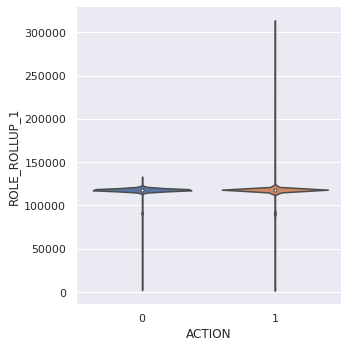

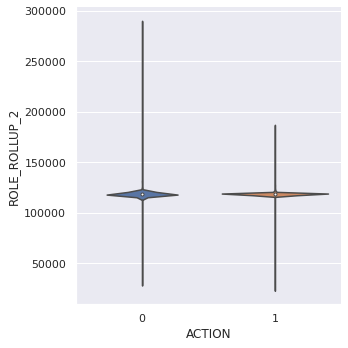

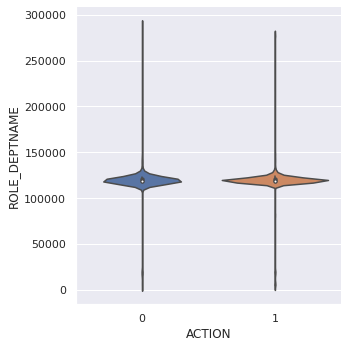

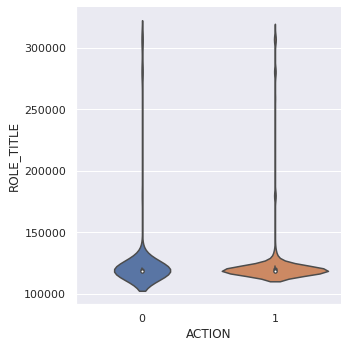

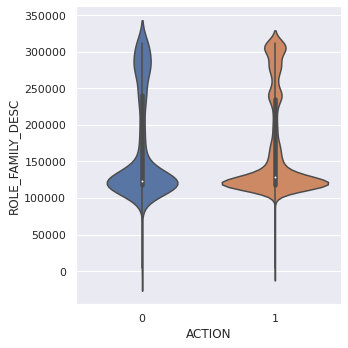

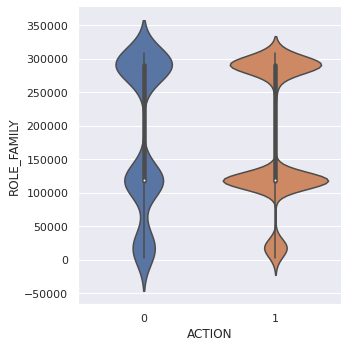

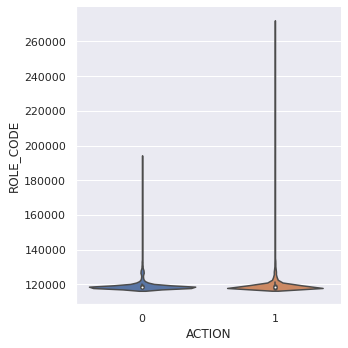

In [ ]:
for i in train.columns:
  sns.catplot(x='ACTION', y=i,kind = 'violin',data=train)

In [ ]:
action = train['ACTION']

train.drop(['ACTION'],axis = 1,inplace = True)

In [ ]:
X = train
Y = action
feature_columns = train.columns

# Splitting the train data to get training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
Y = np.array(y_test)
#accuray score for validation set
print("The accuray on validation dataset is:",accuracy_score(Y,y_pred)*100,"%")

The accuray on validation dataset is: 92.45244634320008 %


In [ ]:
print(y_pred)

[1 1 1 ... 1 0 1]


In [ ]:
id = test['id']
test.drop(['id'],axis = 1,inplace = True)

test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [ ]:
test.shape

(58921, 9)

In [ ]:
model_predictions = clf.predict(test[feature_columns])
results = pd.DataFrame({'Id': id, 'Action': model_predictions})
results.head()

,Id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
results.to_csv('/content/gdrive/MyDrive/1_subtask2method4/Solution.csv', index=False)